# Data Scientist Associate Case Study

## Company Background
EMO is a manufacturer of motorcycles. The company successfully launched its first electric moped in India in 2019. The product team knows how valuable owner reviews are in making improvements to their mopeds. 

Unfortunately they often get reviews from people who never owned the moped. They don’t want to consider this feedback, so would like to find a way to identify reviews from these people. They have obtained data from other mopeds, where they know if the reviewer owned the moped or not. They think this is equivalent to their own reviews.   


## Customer Question
Your manager has asked you to answer the following:
- Can you predict which reviews come from people who have never owned the moped before?  


## Dataset
The dataset contains reviews about other mopeds from a local website. The data you will use for this analysis can be accessed here: `"data/moped.csv"`

| Column Name      | Criteria                                                                                                                                                                    |
|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Used it for      | Character, the purpose of the electric moped for the user, one of “Commuting”, “Leisure”.                                                                                   |
| Owned for        | Character, duration of ownership of vehicle one of  “<= 6 months”, “> 6 months”, “Never Owned”.  Rows that indicate ownership should be combined into the category “Owned”. |
| Model name       | Character, the name of the electric moped.                                                                                                                                   |
| Visual Appeal    | Numeric, visual appeal rating (on a 5 point scale, replace missing values with 0).                                                                                           |
| Reliability      | Numeric, reliability rating (on a 5 point scale, replace missing values with 0).                                                                                             |
| Extra Feature    | Numeric, extra feature rating (on a 5 point scale, replace missing values with 0).                                                                                         |
| Comfort          | Numeric, comfort rating (on a 5 point scale, replace missing values with 0).                                                                                                 |
| Maintenance cost | Numeric, maintenance cost rating (on a 5 point scale, replace missing values with 0).                                                                                        |
| Value for money  | Numeric, value for money rating (on a 5 point scale, replace missing values with 0).                                                                                         |

# Data Scientist Associate Case Study Submission

Use this template to complete your analysis and write up your summary for submission.


## Data Validation
Describe the validation tasks you completed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

I did not add any new columns, but I did create a new dataframe called `mopeds_clean`. 

In that new dataframe, I used the mutate function to replace any `NA` values with `0`. In `mopeds_clean` the changed columns are `Extra.Features`, `Comfort`, `Maintenance.cost` and `Value.for.Money`.

In [2]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above

# 1.1 Alrighty! Let's load the dataset and revisit the research question!
mopeds <- read.csv("data/moped.csv")
str(mopeds)

# There are 713 reviews and 9 variables, 3 character variables and 6 numeric variables

### Research question, predict x (Owned for == "Never owned") from other features

# 1.2 Check all variables in the data against the criteria in the dataset above

### Use, most customers use mopeds for commuting
table(mopeds$Used.it.for, useNA = "always")

### Ownership, most customers have owned the moped, 18% have never owned it
table(mopeds$Owned.for, useNA = "always")

### Model, there are 30 different models
table(mopeds$Model.Name, useNA = "always")

### Visual.Appeal, no missing values
table(mopeds$Visual.Appeal, useNA = "always")

### Reliability, no missing values
table(mopeds$Reliability, useNA = "always")

### Extra.Features, 530 missing values
table(mopeds$Extra.Features, useNA = "always")

### Comfort, 230 missing values
table(mopeds$Comfort, useNA = "always")

### Maintenance, 537 missing values
table(mopeds$Maintenance.cost, useNA = "always")

### Value, 343 missing values
table(mopeds$Value.for.Money, useNA = "always")

'data.frame':	713 obs. of  9 variables:
 $ Used.it.for     : chr  "Commuting" "Leisure" "Commuting" "Commuting" ...
 $ Owned.for       : chr  "Never owned" "> 6 months" "<= 6 months" "> 6 months" ...
 $ Model.Name      : chr  "TVS iQube" "TVS iQube" "TVS iQube" "TVS iQube" ...
 $ Visual.Appeal   : num  3 3 4 1 3 5 3 3 3 5 ...
 $ Reliability     : num  4 1 4 1 4 1 2 1 3 3 ...
 $ Extra.Features  : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Comfort         : num  4 3 5 1 3 5 4 2 4 4 ...
 $ Maintenance.cost: num  NA NA NA NA NA NA NA NA NA NA ...
 $ Value.for.Money : num  1 3 2 1 2 2 3 1 3 3 ...



Commuting   Leisure      <NA> 
      553       160         0 


<= 6 months  > 6 months Never owned        <NA> 
        288         290         135           0 


       Ampere Magnus EX       Ampere Magnus Pro              Ampere REO 
                     25                      16                      21 
            Ampere Zeal              Ather 450X            Bajaj Chetak 
                      9                      26                      13 
           Benling Aura               BGauss B8      Bounce Infinity E1 
                     19                       1                      10 
         e-bike Gen Nxt             Evolet Polo     Gemopai Astrid Lite 
                      3                       2                       3 
          Gemopai Ryder     Hero Electric Atria     Hero Electric Flash 
                      5                       3                      94 
      Hero Electric NYX    Hero Electric Optima Hero Electric Optima CX 
                      8                      75                       9 
   Hero Electric Photon      Joy e-bike Monster         Joy e-bike Wolf 
                     34                       2   


   1    2    3    4    5 <NA> 
  90   38  106  192  287    0 


   1    2    3    4    5 <NA> 
 176   53   91  157  236    0 


   1    2    3    4    5 <NA> 
  60   24   15   37   47  530 


   1    2    3    4    5 <NA> 
  74   38   64  150  184  203 


   1    2    3    4    5 <NA> 
  31   18   15   75   37  537 


   1    2    3    4    5 <NA> 
  85   25   35  118  107  343 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Model.Name,n,freq
<chr>,<int>,<dbl>
Ampere Magnus EX,25,0.03506311
Ampere Magnus Pro,16,0.02244039
Ampere REO,21,0.02945302
Ampere Zeal,9,0.01262272
Ather 450X,26,0.03646564
Bajaj Chetak,13,0.01823282


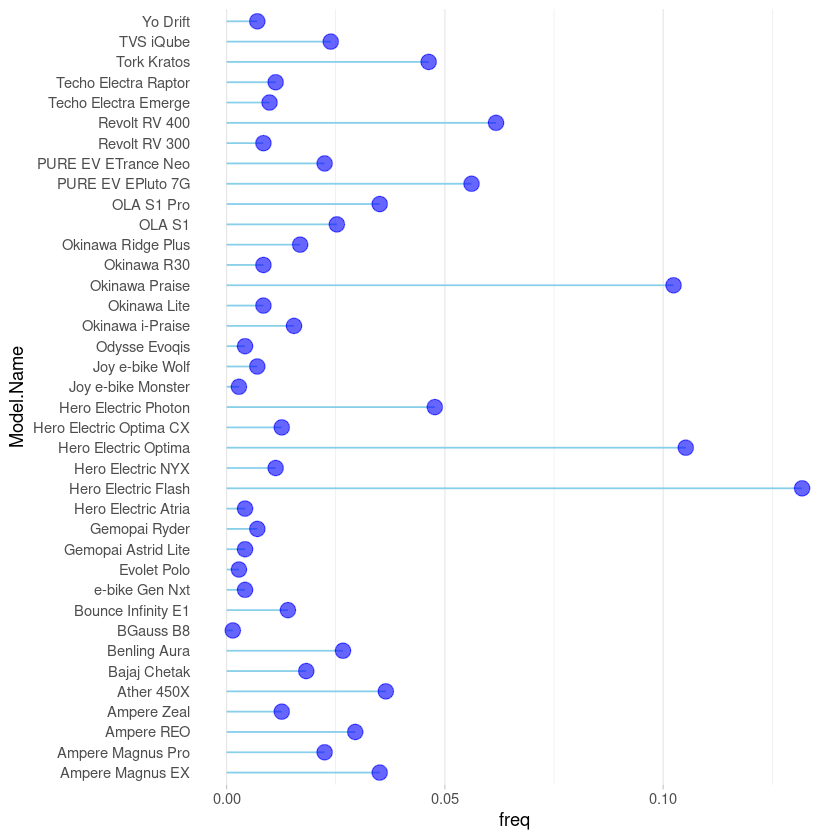

In [3]:
# I wanted to see which models were the most frequently used in the dataset
library(ggplot2)
library(dplyr)

# Data
mplot <- mopeds %>%
  group_by(Model.Name) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))
head(mplot)

# Horizontal version of lollipop plot
ggplot(mplot, aes(x=Model.Name, y=freq)) +
  geom_segment(aes(x=Model.Name, xend=Model.Name, y=0, yend=freq), color="skyblue") +
  geom_point( color="blue", size=4, alpha=0.6) +
  theme_light() +
  coord_flip() +
  theme(
    panel.grid.major.y = element_blank(),
    panel.border = element_blank(),
    axis.ticks.y = element_blank()
  )

In [4]:
# Replace All NAs with zero as per the instructions above
mopeds_clean <- mopeds %>% replace(is.na(.), 0)
head(mopeds_clean)

# Check that variables are numeric or characters
str(mopeds_clean)

,Used.it.for,Owned.for,Model.Name,Visual.Appeal,Reliability,Extra.Features,Comfort,Maintenance.cost,Value.for.Money
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Commuting,Never owned,TVS iQube,3,4,0,4,0,1
2,Leisure,> 6 months,TVS iQube,3,1,0,3,0,3
3,Commuting,<= 6 months,TVS iQube,4,4,0,5,0,2
4,Commuting,> 6 months,TVS iQube,1,1,0,1,0,1
5,Commuting,> 6 months,TVS iQube,3,4,0,3,0,2
6,Commuting,> 6 months,TVS iQube,5,1,0,5,0,2


'data.frame':	713 obs. of  9 variables:
 $ Used.it.for     : chr  "Commuting" "Leisure" "Commuting" "Commuting" ...
 $ Owned.for       : chr  "Never owned" "> 6 months" "<= 6 months" "> 6 months" ...
 $ Model.Name      : chr  "TVS iQube" "TVS iQube" "TVS iQube" "TVS iQube" ...
 $ Visual.Appeal   : num  3 3 4 1 3 5 3 3 3 5 ...
 $ Reliability     : num  4 1 4 1 4 1 2 1 3 3 ...
 $ Extra.Features  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Comfort         : num  4 3 5 1 3 5 4 2 4 4 ...
 $ Maintenance.cost: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Value.for.Money : num  1 3 2 1 2 2 3 1 3 3 ...


## Exploratory Analysis
Describe what you found in the exploratory analysis. In your description you should:
1- Reference at least two different data visualizations you created above to demonstrate the characteristics of variables
2- Reference at least one data visualization you created above to demonstrate the relationship between two or more variables
3- Describe what your exploratory analysis has told you about the data
4- Describe any changes you have made to the data to enable modeling

----------------------------

1. To visualize differences between never owners, > 6 month owners, and < 6 month owners, I plotted barplots and density plots, using the `facet_wrap` function to view the data by ownership. 

2. To demonstrate the relationship between variables, I plotted three *corrgrams*. One for never owners, owners of the moped for less than 6 months, and owners of the moped for 6 months or more. A corrgram is a visual display technique that helped me to represent the pattern of relations among a the different values of moped reviews in terms of their correlations.

3. Here are my observations:

## Barplots ##

Never owners tended to rate visual appeal, reliability, and comfort very high compared to other aspects and also compared to the other owners (> 6 months and < 6 months).

## Density plots ##

Never owners tended to rate visual appeal, reliability, and comfort very high compared to other aspects and also compared to the other owners (> 6 months and < 6 months). 

## Corrgrams ##

**a**. The negative correlation between extra features and comfort appears to become stronger for reviewers who have never owned a moped.

**b**. The negative correlation between maintenance and comfort also appears to become stronger for reviewers who have never owned a moped.

**c**. The positive correlation between comfort and value appears to become stronger for reviewers who have owned a moped for under 6 months and becomes even stronger for owners of mopeds for at least 6 months.

I think that the relation between comfort and the other variables (value or maintenance) might be different in magnitude and direction based on actual ownership of a moped. Comfort might therefore be an important feature in a machine learning model. 

Never owners also tend to "over rate" visual appeal, reliability, and comfort.

4. In the next section (modeling) I performed some changes to the data to enable modeling. 

## Logistic regression ##

I made sure that features were all represented numerically. I created a new variable called `non-owner`, where the target (i.e., never owning a moped) is equal to 1 and actually owning a moped is equal to 0. I also created a second variable called `used_commute` where if the reviewer claimed to use the moped for commuting, the variable would equal 1, and if the moped was used for liesure, it would equal 0. 

`mutate(
  non_owner = ifelse(Owned.for == "Never owned", 1, 0),
  used_commute = ifelse(Used.it.for == "Commuting", 1, 0),  
  .keep = "unused",
)`


## k-NN model ##

Again, all features here needed to be represented numerically, which was done in the previous step. 
So the first thing I did was pre-process the predictor variables by centering and scaling the data. In a nutshell, centering a variable is subtracting the mean of the variable from each data point so that the new variable's mean is 0. Scaling a variable is multiplying each data point by a constant in order to change the range of the data. Centering and scaling can improve the model's performance.

Then I split the data into training and test sets. I split into 50%/50% halves.

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/ggpubr_0.4.0.tar.gz' ...
	OK [downloaded 1.8 Mb in 0.1 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/ggsci_2.9.tar.gz' ...
	OK [downloaded 2.8 Mb in 0.1 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/cowplot_1.1.1.tar.gz' ...
	OK [downloaded 1.3 Mb in 0.1 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/ggsignif_0.6.4.tar.gz' ...
	OK [downloaded 595.2 Kb in 0.1 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/polynom_1.4-1.tar.gz' ...
	OK [downloaded 395.1 Kb in 0.1 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/rstatix_0.7.0.tar.gz' ...
	OK [downloaded 583.8 Kb in 0.1 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/corrplot_0.92.tar.gz' ..


Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend




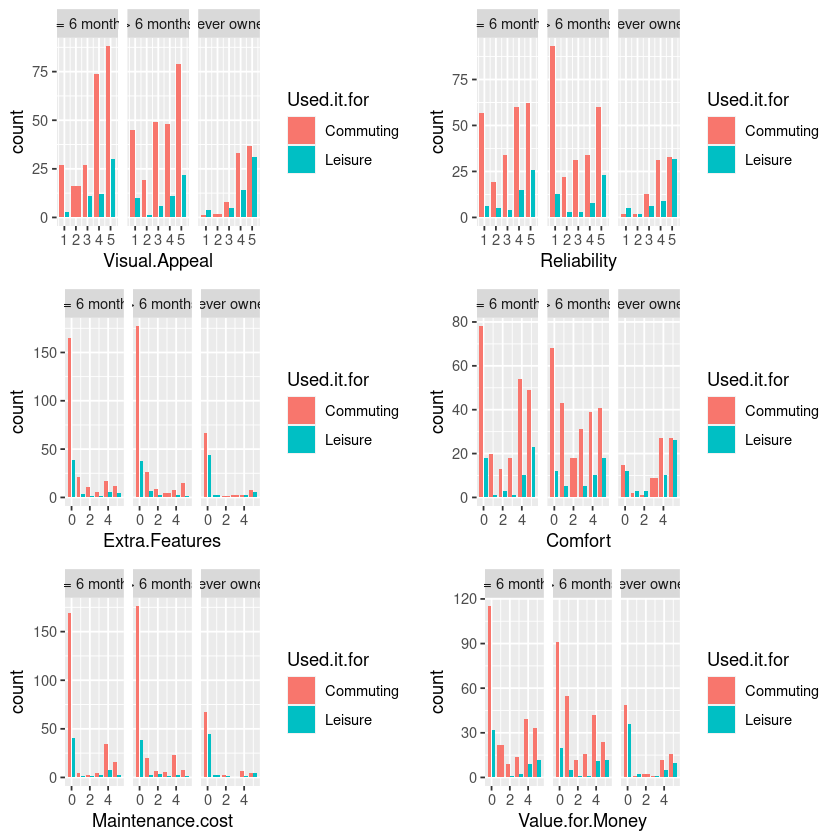

In [5]:
### 1.5 Visualize what's going on with the data

### 1.6 PLOT #1

# Bargraphs
library(ggplot2)

# Visual Appeal
p <- ggplot(data = mopeds_clean, aes(x = Visual.Appeal)) + geom_bar(aes(fill = Used.it.for), position = "dodge2")
a <- p + facet_wrap(~Owned.for)

# Reliability
p <- ggplot(data = mopeds_clean, aes(x = Reliability)) + geom_bar(aes(fill = Used.it.for), position = "dodge2") 
b <- p + facet_wrap(~Owned.for)

# Extra.Features 
p <- ggplot(data = mopeds_clean, aes(x = Extra.Features)) + geom_bar(aes(fill = Used.it.for), position = "dodge2") 
c <- p + facet_wrap(~Owned.for)

# Comfort 
p <- ggplot(data = mopeds_clean, aes(x = Comfort)) + geom_bar(aes(fill = Used.it.for), position = "dodge2") 
d <- p + facet_wrap(~Owned.for)

# Maintenance.cost 
p <- ggplot(data = mopeds_clean, aes(x = Maintenance.cost)) + geom_bar(aes(fill = Used.it.for), position = "dodge2") 
e <- p + facet_wrap(~Owned.for)

# Value.for.Money 
p <- ggplot(data = mopeds_clean, aes(x = Value.for.Money)) + geom_bar(aes(fill = Used.it.for), position = "dodge2") 
f <- p + facet_wrap(~Owned.for)

install.packages("ggpubr")
library(ggpubr)

library("cowplot")
plot_grid(a,b,c,d,e,f,
          label_x = 0,
          ncol = 2, nrow = 3)

### So the main thing I've noticed is that never owners tend to use mopeds more for liesure and also tend to rate visual appeal, and comfort very high compared to other aspects

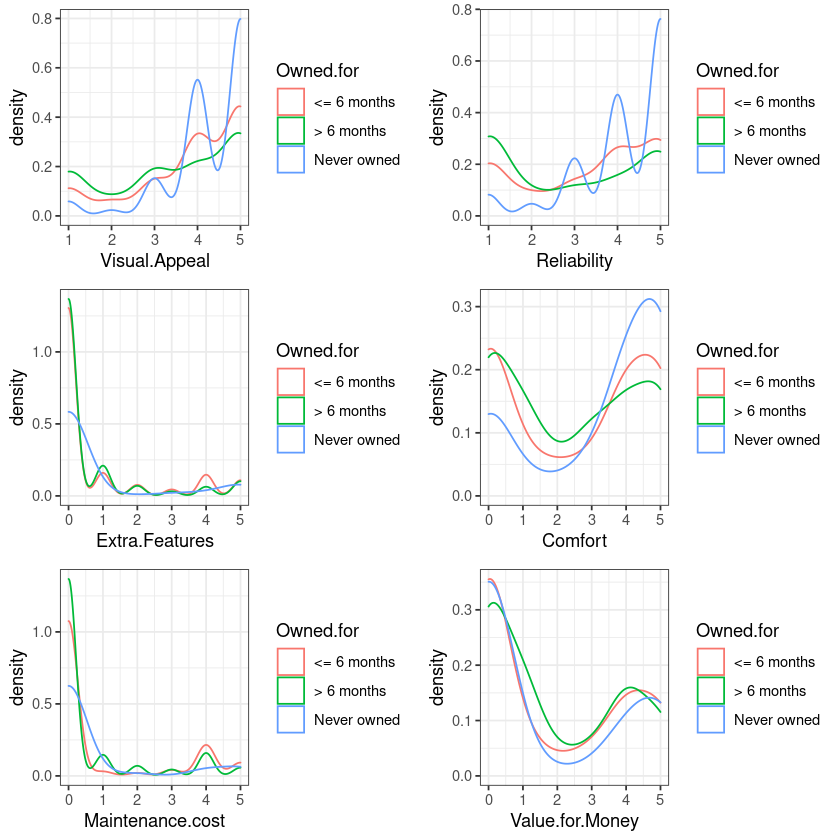

In [6]:
### 1.7 Plot 1.5
#create density plots

library(ggplot2)
# Basic density
g <- ggplot(mopeds_clean, aes(x=Visual.Appeal, color=Owned.for)) + 
  geom_density() + theme_bw()

h <- ggplot(mopeds_clean, aes(x=Reliability, color=Owned.for)) + 
  geom_density() + theme_bw()

i <- ggplot(mopeds_clean, aes(x=Extra.Features, color=Owned.for)) + 
  geom_density() + theme_bw()

j <- ggplot(mopeds_clean, aes(x=Comfort, color=Owned.for)) + 
  geom_density() + theme_bw()

k <- ggplot(mopeds_clean, aes(x=Maintenance.cost, color=Owned.for)) + 
  geom_density() + theme_bw()

l <- ggplot(mopeds_clean, aes(x=Value.for.Money, color=Owned.for)) + 
  geom_density() + theme_bw()


library("cowplot")
plot_grid(g,h,i,j,k,l,
          label_x = 0,
          ncol = 2, nrow = 3)

### So the main thing I've noticed here is that never owners tend to rate visual appeal, reliability, and comfort very high compared to other aspects and other owners

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/corrgram_1.14.tar.gz' ...
	OK [downloaded 391.3 Kb in 0.3 secs]
Installing corrgram [1.14] ...
	OK [installed binary]
Moving corrgram [1.14] into the cache ...
	OK [moved to cache in 0.35 milliseconds]


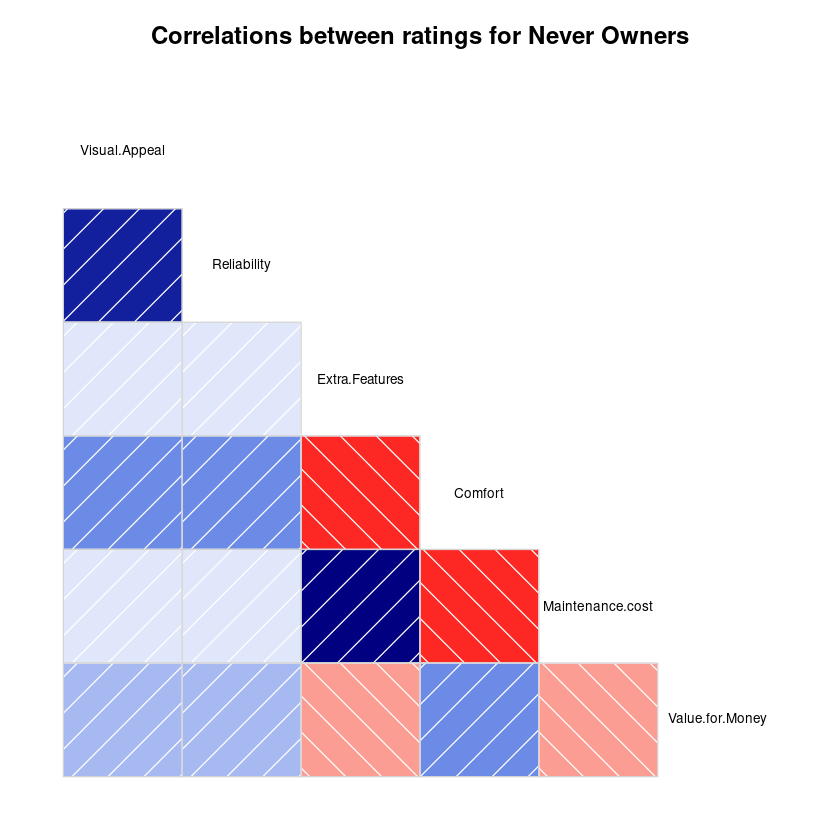

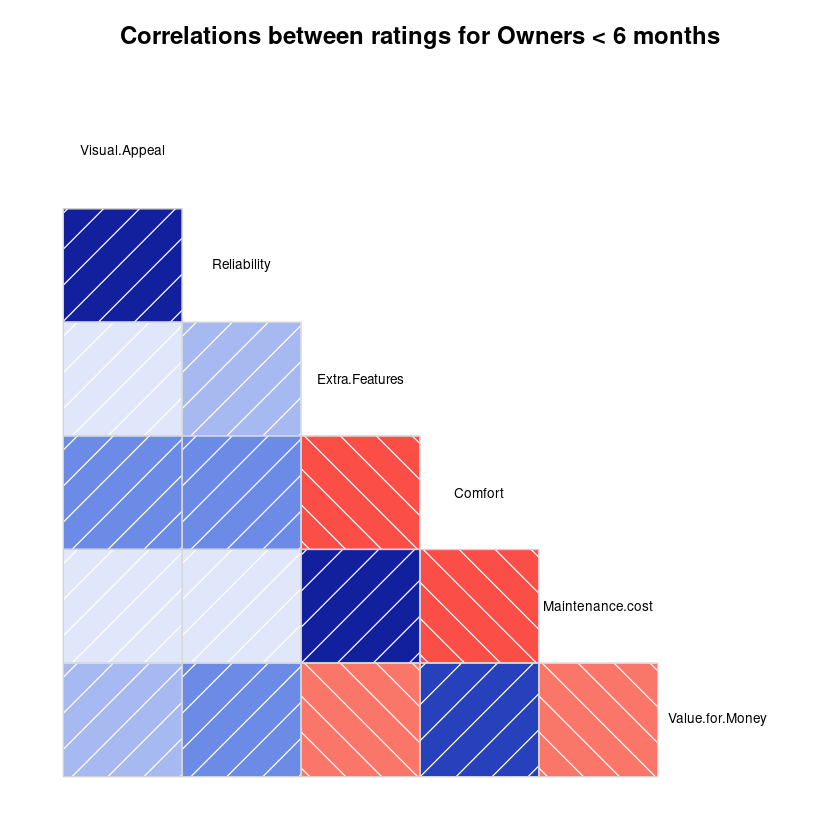

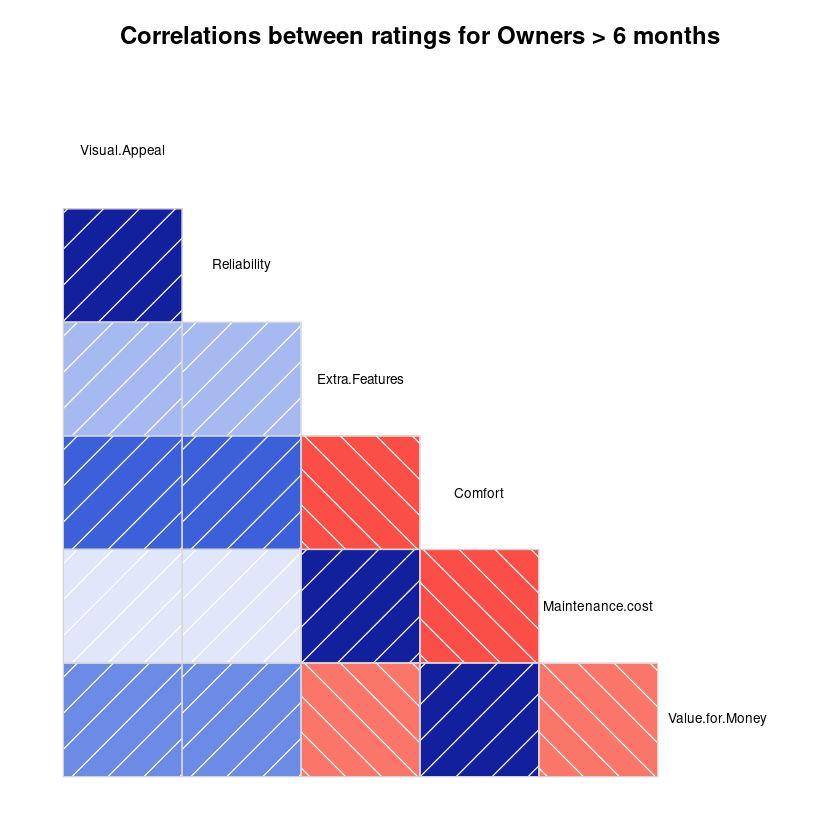

In [7]:
### 1.8 PLOT #2
# Correlation maps

#I'd like to see which variables seem most correlated with type of ownership

never_owners <- subset(mopeds_clean, Owned.for == "Never owned",
select=c(Visual.Appeal, Reliability, Extra.Features, Comfort, Maintenance.cost, Value.for.Money))

owners_less6 <- subset(mopeds_clean, Owned.for == "<= 6 months",
select=c(Visual.Appeal, Reliability, Extra.Features, Comfort, Maintenance.cost, Value.for.Money))

owners_more6 <- subset(mopeds_clean, Owned.for == "> 6 months",
select=c(Visual.Appeal, Reliability, Extra.Features, Comfort, Maintenance.cost, Value.for.Money))

install.packages("corrgram")
library(corrgram)

corrgram(never_owners, order=NULL, lower.panel=panel.shade, upper.panel=NULL, text.panel=panel.txt, main="Correlations between ratings for Never Owners")

corrgram(owners_less6, order=NULL, lower.panel=panel.shade, upper.panel=NULL, text.panel=panel.txt, main="Correlations between ratings for Owners < 6 months")

corrgram(owners_more6, order=NULL, lower.panel=panel.shade, upper.panel=NULL, text.panel=panel.txt, main="Correlations between ratings for Owners > 6 months")

### So the only features I've notices are that extra features * comfort appear to become more negative in relation
# And comfort * maintenance becomes more negative in relation also
# whereas maintenance cost * value becomes more positively correlated for actual moped owners

## Model Fitting
Describe your approach to the model fitting. In your description you should:
- Describe what type of machine learning problem you are working on
- Describe which method you selected for the baseline model and explain why you chose this model
- Describe which method you selected for the comparison model and explain why you chose this model

-------

Classification is the process of predicting the class (or type) of given data points, here whether a reviewer is an owner of a moped or not.

For the baseline model, I chose a logistic regression model with no predictors (a null model). 
I started with a null model because it essentially has the same meaning as "null hypothesis": the model if the null hypothesis is true.
Then I continued with a full model to see the effects of all the predictors.
Then finally used a stepwise model to select the best predictors for me, which should ideally be a good comparator.

In [8]:
# Before running any models, I want to make sure I have only the variables I need
library(dplyr)
mopeds_reg <- mopeds_clean %>% 
mutate(
  non_owner = ifelse(Owned.for == "Never owned", 1, 0),
  used_commute = ifelse(Used.it.for == "Commuting", 1, 0),  
  .keep = "unused",
)

head(mopeds_reg)

mopeds_regression_ready <- mopeds_reg %>%
select(non_owner, used_commute, Visual.Appeal, Reliability, Extra.Features, Comfort, Maintenance.cost, Value.for.Money)

head(mopeds_regression_ready) #great!

,Model.Name,Visual.Appeal,Reliability,Extra.Features,Comfort,Maintenance.cost,Value.for.Money,non_owner,used_commute
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TVS iQube,3,4,0,4,0,1,1,1
2,TVS iQube,3,1,0,3,0,3,0,0
3,TVS iQube,4,4,0,5,0,2,0,1
4,TVS iQube,1,1,0,1,0,1,0,1
5,TVS iQube,3,4,0,3,0,2,0,1
6,TVS iQube,5,1,0,5,0,2,0,1


,non_owner,used_commute,Visual.Appeal,Reliability,Extra.Features,Comfort,Maintenance.cost,Value.for.Money
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,3,4,0,4,0,1
2,0,0,3,1,0,3,0,3
3,0,1,4,4,0,5,0,2
4,0,1,1,1,0,1,0,1
5,0,1,3,4,0,3,0,2
6,0,1,5,1,0,5,0,2


Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/pROC_1.18.0.tar.gz' ...
	OK [downloaded 1.4 Mb in 0.1 secs]
Installing pROC [1.18.0] ...
	OK [installed binary]
Moving pROC [1.18.0] into the cache ...
	OK [moved to cache in 0.35 milliseconds]


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.7576

Start:  AIC=693.99
non_owner ~ 1

                   Df Deviance    AIC
+ Reliability       1   643.52 647.52
+ used_commute      1   665.29 669.29
+ Visual.Appeal     1   666.71 670.71
+ Comfort           1   668.80 672.80
<none>                  691.99 693.99
+ Maintenance.cost  1   690.04 694.04
+ Value.for.Money   1   690.54 694.54
+ Extra.Features    1   691.96 695.96

Step:  AIC=647.52
non_owner ~ Reliability

                   Df Deviance    AIC
+ used_commute      1   627.50 633.50
+ Value.for.Money   1   633.18 639.18
+ Maintenance.cost  1   639.68 645.68
+ Comfort           1   640.36 646.36
<none>                  643.52 647.52
+ Extra.Features    1   642.22 648.22
+ Visual.Appeal     1   643.17 649.17

Step:  AIC=633.5
non_owner ~ Reliability + used_commute

                   Df Deviance    AIC
+ Value.for.Money   1   617.99 625.99
+ Maintenance.cost  1   624.63 632.63
+ Comfort           1   625.22 633.22
<none>                  627.50 633.50
+ Extra.Features    1   626.

Setting levels: control = 0, case = 1

Setting direction: controls < cases



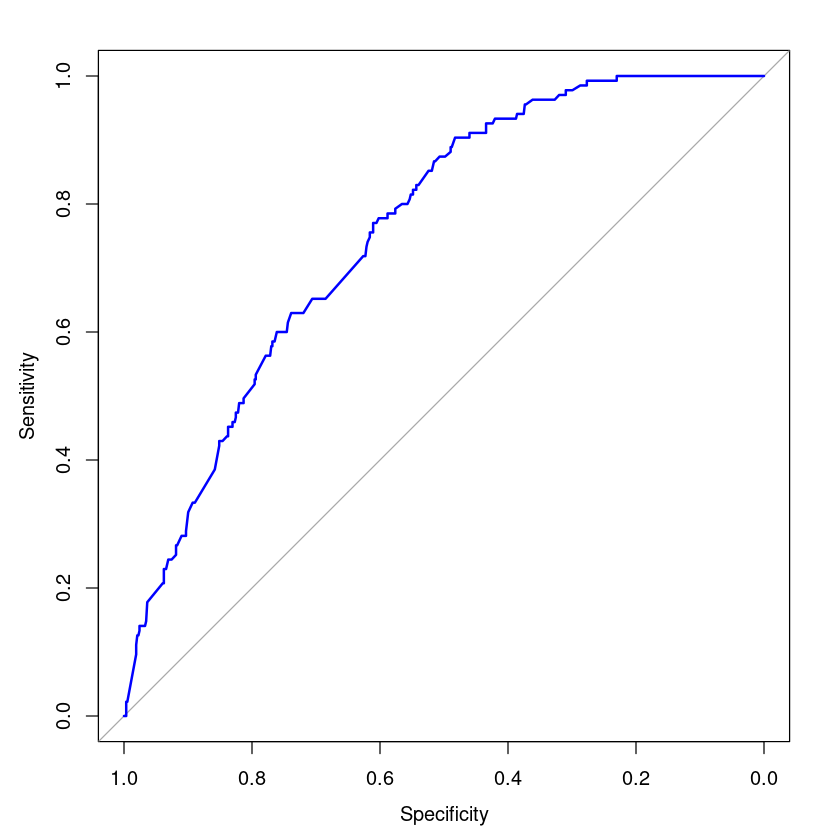

Area under the curve: 0.7488

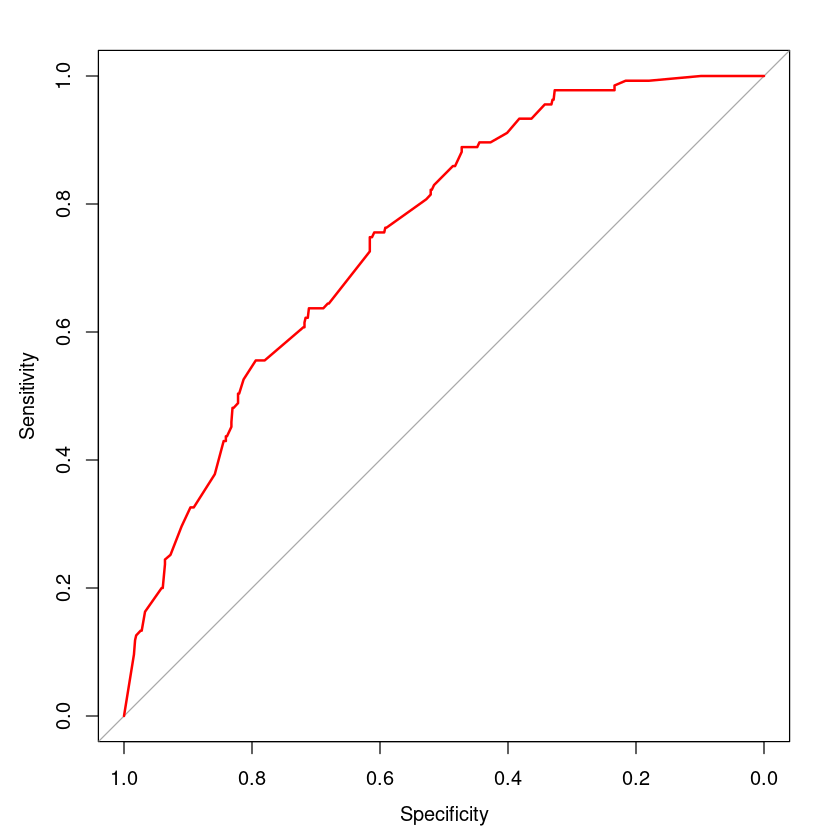

In [9]:
# this would be a classification problem as I'm trying to separate owners from non-owners
# I'm using logistic regression
install.packages("pROC")

# Specify a null model with no predictors
null_model <- glm(non_owner ~ 1, data = mopeds_regression_ready, family = "binomial")

# Specify the full model using all of the potential predictors
full_model <- glm(non_owner ~ ., data = mopeds_regression_ready, family = "binomial")

# Estimate the stepwise donation probability
full_prob <- predict(full_model, type = "response")

# Plot the ROC of the full model
library(pROC)
ROC1 <- roc(mopeds_regression_ready$non_owner, full_prob)
plot(ROC1, col = "blue")
auc(ROC1)

# Use a forward stepwise algorithm to build a parsimonious model
step_model <- step(null_model, scope = list(lower = null_model, upper = full_model), direction = "forward")

# Estimate the stepwise donation probability
step_prob <- predict(step_model, type = "response")

# Plot the ROC of the stepwise model
ROC2 <- roc(mopeds_regression_ready$non_owner, step_prob)
plot(ROC2, col = "red")
auc(ROC2)

# Both models kind of suck at predicting non-owners!

In [10]:
# I quite like K-nearest meighbors models, so let's try one here
install.packages("caret")
library(caret)

mopeds_regression_ready$output <- as.factor(mopeds_regression_ready$non_owner)

# Pre-Processing of Predictors
preProcess <- c("center","scale")
# split the data into training and test sets, I like to split by .5, I think it's standard
i <- createDataPartition(y = mopeds_regression_ready$output, times = 1, p = 0.5, list = FALSE)
# training set = people in i
training_set <- mopeds_regression_ready[i,]
# training set = people not in i
test_set <- mopeds_regression_ready[-i,]
# Use resampling to find the “best model” by choosing the values of the tuning parameters
# trControl will specify the resampling scheme
trControl <- trainControl(method = "repeatedcv", number = 100, repeats = 100)
# train specifies how cross-validation should be performed to find the best values of the tuning parameters
model <- train(output ~ ., method='knn', data = training_set, metric='Accuracy', preProcess = preProcess, trControl= trControl)
# this takes a few minutes to run!

# run this line to see info about the model, it's a k-nearest neighbors model
model

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/caret_6.0-93.tar.gz' ...
	OK [downloaded 3.4 Mb in 0.2 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/ModelMetrics_1.2.2.2.tar.gz' ...
	OK [downloaded 1.1 Mb in 0.2 secs]
Installing ModelMetrics [1.2.2.2] ...
	OK [installed binary]
Moving ModelMetrics [1.2.2.2] into the cache ...
	OK [moved to cache in 0.35 milliseconds]
Installing caret [6.0-93] ...
	OK [installed binary]
Moving caret [6.0-93] into the cache ...
	OK [moved to cache in 0.34 milliseconds]


Loading required package: lattice


Attaching package: ‘lattice’


The following object is masked from ‘package:corrgram’:

    panel.fill


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


k-Nearest Neighbors 

357 samples
  8 predictor
  2 classes: '0', '1' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (100 fold, repeated 100 times) 
Summary of sample sizes: 353, 353, 354, 353, 353, 354, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.9922333  0.9558824
  7  0.9920583  0.9548529
  9  0.9920833  0.9550000

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 5.

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 289   3
         1   0  64
                                          
               Accuracy : 0.9916          
                 95% CI : (0.9756, 0.9983)
    No Information Rate : 0.8118          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9719          
                                          
 Mcnemar's Test P-Value : 0.2482          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9552          
         Pos Pred Value : 0.9897          
         Neg Pred Value : 1.0000          
             Prevalence : 0.8118          
         Detection Rate : 0.8118          
   Detection Prevalence : 0.8202          
      Balanced Accuracy : 0.9776          
                                          
       'Positive' Class : 0               
                              

          Reference
Prediction   0   1
         0 289   3
         1   0  64

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9851

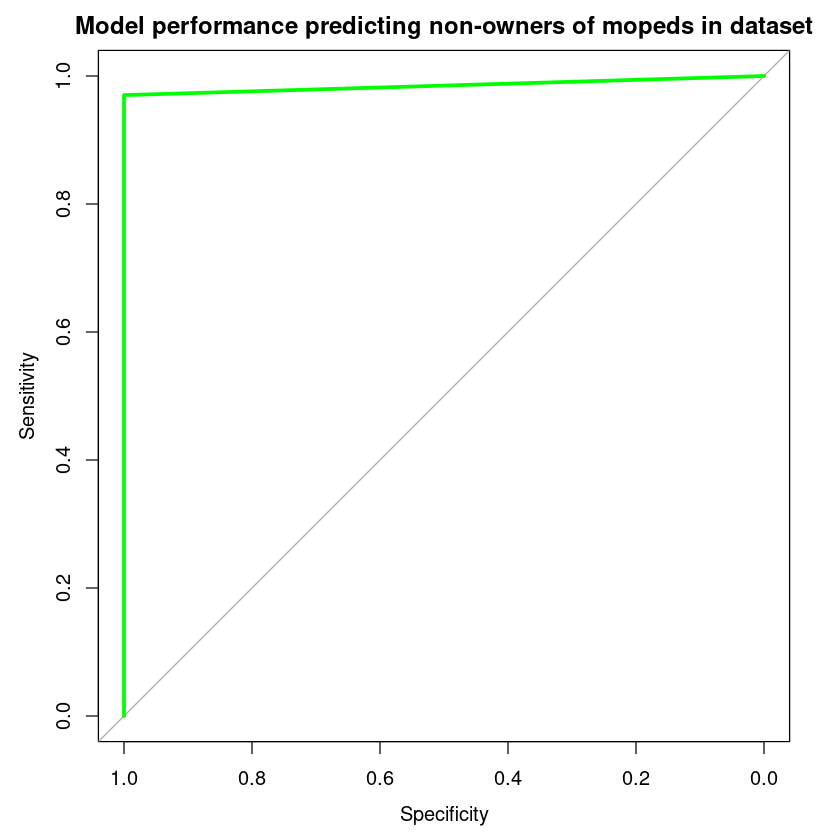

In [11]:
### Adding a new code block so I don't run the knn model over and over by accident

### Training model done, check the output

# use the model to predict follow-ups from the test set
test_set$pred <- predict(model, test_set)
# the values the model predicted
test_set$factor_pred <- as.factor(test_set$pred)
# the values I chose as the "gold standard"
test_set$factor_truth <- as.factor(test_set$output)
# makes a confusion matrix
cm <- confusionMatrix(test_set$pred, test_set$output)

# running this line will output the model results AND the confusion matrix
cm

# for just the confusion matrix
accuracy <- cm$overall[1]
confusion_matrix <- cm$table
confusion_matrix

### Plot a ROC curve (receiver operating characteristic curve)
# we want the corner of the red line to be as close as possible to the top left corner
# the model performs pretty well, so that's what we should see!

library(pROC)
test_set$pred <- predict(model, test_set, probability=TRUE)
roc_curve = roc(test_set$output, predictor=factor(test_set$pred, ordered = TRUE))
plot(roc_curve, col="green", lwd=3, main = 'Model performance predicting non-owners of mopeds in dataset')
auc(roc_curve)

## Model Evaluation
Explain what the results of your evaluation tell you. You should:
- Describe which metric you have selected to compare the models and why
- Explain what the outcome of this evaluation tells you about the performance of your models
- Identify, based on the evaluation, which you would consider to be the better performing approach

-------

I used AUC (Area under the curve) to define how well the model classifes non-owners of mopeds from moped owners. 
AUC tells me how much the model is capable of distinguishing between owners and non-owners of mopeds given the data. The higher the AUC, the better the model is at distinguishing between reviews where the writier is a moped owner from reviews where the writer does not own a moped.

For the first regression analysis, the AUC was 0.75, or 75% accuracy.
For the second regression analysis, the AUC was 0.748, or again around 75% accuracy.
For the k-NN model, the AUC was 0.992, or 99.2% accuracy. This made it the best performing model for the job. 

BUT because k-NN models are a bit of a black box, I can't interpret which features are most or least predictive of being useful for predicting non-owners of the moped. 

From the logistic regression, the best fitting model had an AIC=614.58. This model looked like this: `non_owner ~ Reliability + used_commute + Value.for.Money + Comfort`. So I think the features that best predict never owning the moped are reliability, using the moped to commute, value for money, and comfort. 

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review grading rubric, have you included everything that will be graded?
- Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your case study